In [5]:
import zipfile
import fiona
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import dask_geopandas as dgpd

In [ ]:
#Unzip the datafiles

with zipfile.ZipFile("RDS-2013-0009.5_Data_Format2_GDB.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [7]:
#Listing down features in .gdb file

for feature_class in fiona.listlayers("Data/FPA_FOD_20210617.gdb"):
    print(feature_class)

Fires
NWCG_UnitIdActive_20200123


In [9]:
fire_df = gpd.read_file("Data/FPA_FOD_20210617.gdb", layer="Fires") #Read main layer
fire_df.head(10)

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
0,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,...,0.10,A,40.036944,-121.005833,USFS,CA,63,06063,Plumas County,POINT (-121.00583 40.03694)
1,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,...,0.25,A,38.933056,-120.404444,USFS,CA,61,06061,Placer County,POINT (-120.40444 38.93306)
2,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,...,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,06017,El Dorado County,POINT (-120.73556 38.98417)
3,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,...,0.10,A,38.559167,-119.913333,USFS,CA,3,06003,Alpine County,POINT (-119.91333 38.55917)
4,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,...,0.10,A,38.559167,-119.933056,USFS,CA,3,06003,Alpine County,POINT (-119.93306 38.55917)
5,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,54,...,0.10,A,38.635278,-120.103611,USFS,CA,5,06005,Amador County,POINT (-120.10361 38.63528)
6,7,FS-1418851,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,58,...,0.10,A,38.688333,-120.153333,USFS,CA,17,06017,El Dorado County,POINT (-120.15333 38.68833)
7,8,FS-1418854,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,3,...,0.80,B,40.968056,-122.433889,STATE OR PRIVATE,CA,None,None,None,POINT (-122.43389 40.96806)
8,9,FS-1418856,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,5,...,1.00,B,41.233611,-122.283333,STATE OR PRIVATE,CA,None,None,None,POINT (-122.28333 41.23361)
9,10,FS-1418859,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,61,...,0.10,A,38.548333,-120.149167,USFS,CA,5,06005,Amador County,POINT (-120.14917 38.54833)


In [10]:
fire_df.columns

Index(['FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
       'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'geometry'],
      dtype='object')

In [11]:
fire_CA = fire_df[fire_df["STATE"]=='CA']
len(fire_CA)

235229

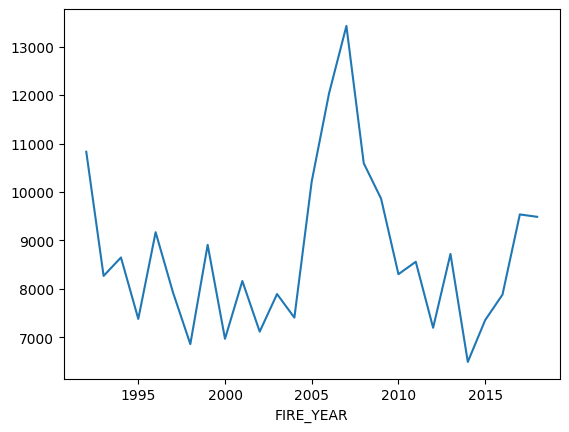

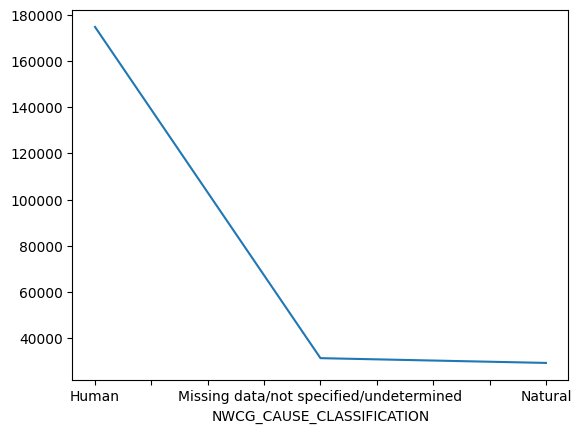

<AxesSubplot: xlabel='FIRE_SIZE_CLASS'>

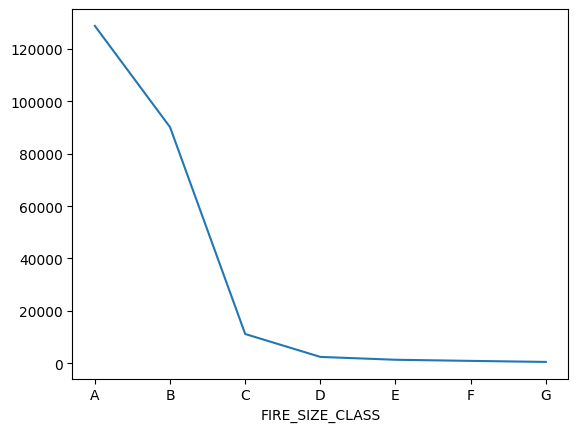

In [12]:
fire_CA.groupby('FIRE_YEAR').count()['FIRE_SIZE'].plot() #Check correlation in counts & weather parameters
plt.show()
fire_CA.groupby('NWCG_CAUSE_CLASSIFICATION').count()['FIRE_SIZE'].plot()
plt.show()
fire_CA.groupby('FIRE_SIZE_CLASS').count()['FIRE_SIZE'].plot()

In [21]:
score_map = {'A': 1, 'B': 2, 'C': 3, 'D':4, 'E':5, 'F':6}
fire_CA['fire_score']= fire_CA['FIRE_SIZE_CLASS'].apply(lambda x: score_map.get(x, 0))

C:\Users\pranj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [31]:
import folium

m= fire_CA[fire_CA['FIRE_SIZE_CLASS']=='G'].explore(column="FIRE_SIZE",  
    tooltip="FIRE_SIZE_CLASS",  # show "BoroName" value in tooltip (on hover)
    popup=True,  # show all values in popup (on click)
    tiles="OpenStreetMap",  # use "CartoDB positron" tiles
    cmap="viridis",  # use "Set1" matplotlib colormap
    # style_kwds={"style_function":lambda x: {"radius":x["properties"]["fire_score"]}}  # use black outline
    
)
outfp = r"base_map.html"

m.save(outfp)

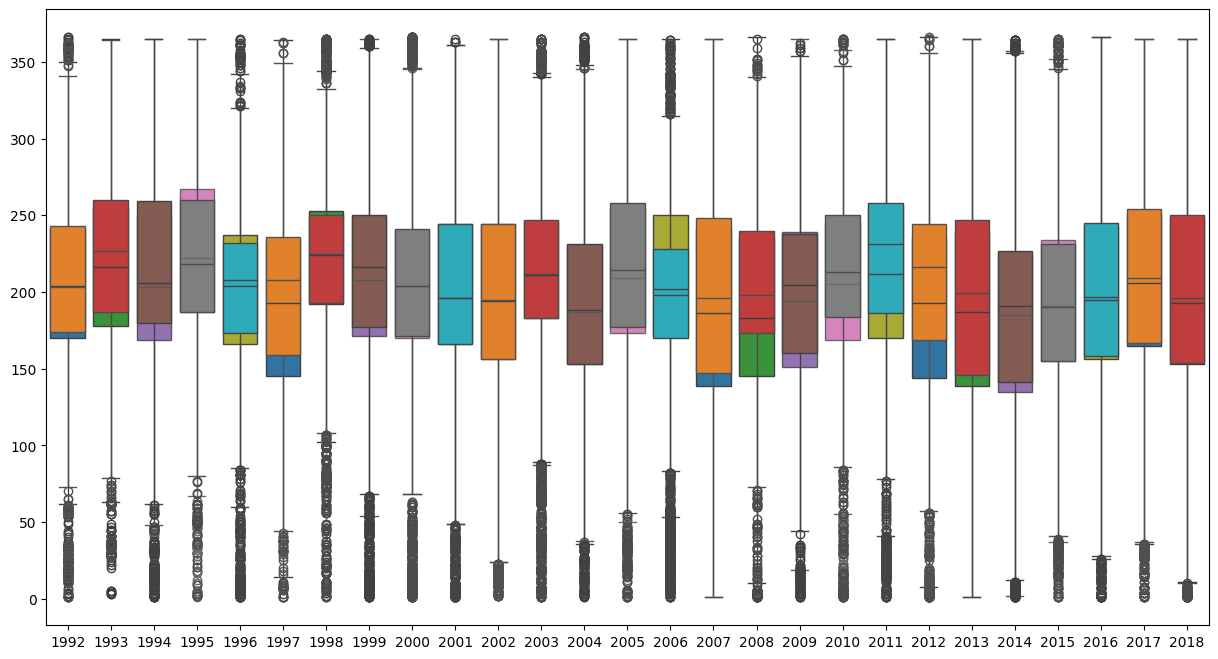

In [86]:
plt.figure(figsize=(15,8))
for i in sorted(fire_CA['FIRE_YEAR'].unique()):
    sns.boxplot(x=i, y=fire_CA.groupby('FIRE_YEAR')['DISCOVERY_DOY'].apply(list)[i])
    sns.boxplot(x=i, y=fire_CA.groupby('FIRE_YEAR')['CONT_DOY'].apply(list)[i])

C:\Users\pranj\AppData\Local\Temp\ipykernel_24972\657736608.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sns.stripplot(x=i, y=fire_CA.groupby('FIRE_YEAR').apply(lambda x: x['CONT_DOY']-x['DISCOVERY_DOY'])[i])
C:\Users\pranj\AppData\Local\Temp\ipykernel_24972\657736608.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sns.stripplot(x=i, y=fire_CA.groupby('FIRE_YEAR').apply(lambda x: x['CONT_DOY']-x[

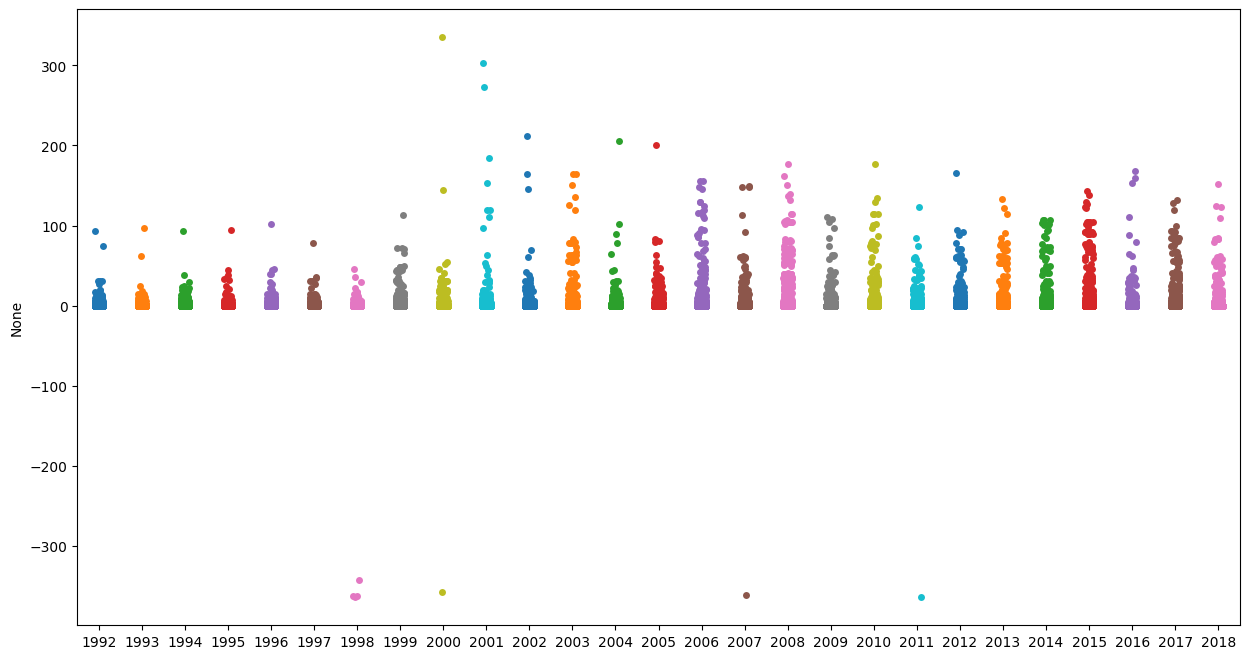

In [125]:
plt.figure(figsize=(15,8))
for i in sorted(fire_CA['FIRE_YEAR'].unique()):
    sns.stripplot(x=i, y=fire_CA.groupby('FIRE_YEAR').apply(lambda x: x['CONT_DOY']-x['DISCOVERY_DOY'])[i])

C:\Users\pranj\AppData\Local\Temp\ipykernel_24972\2794945969.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fire_CA.groupby('FIRE_YEAR').apply(lambda x: max(x['CONT_DOY']-x['DISCOVERY_DOY'])).plot()


<AxesSubplot: xlabel='FIRE_YEAR'>

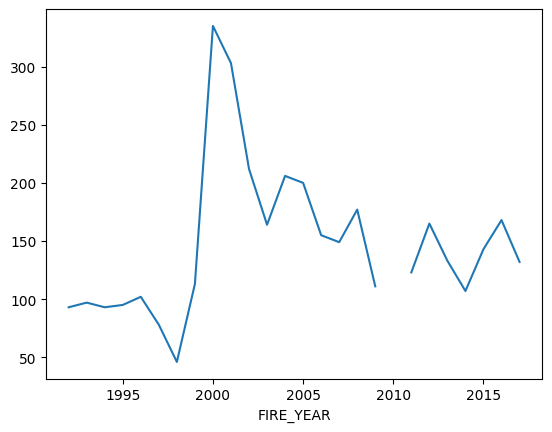

In [124]:
fire_CA.groupby('FIRE_YEAR').apply(lambda x: max(x['CONT_DOY']-x['DISCOVERY_DOY'])).plot()

In [126]:
fire_CA= fire_CA[['FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'geometry']]

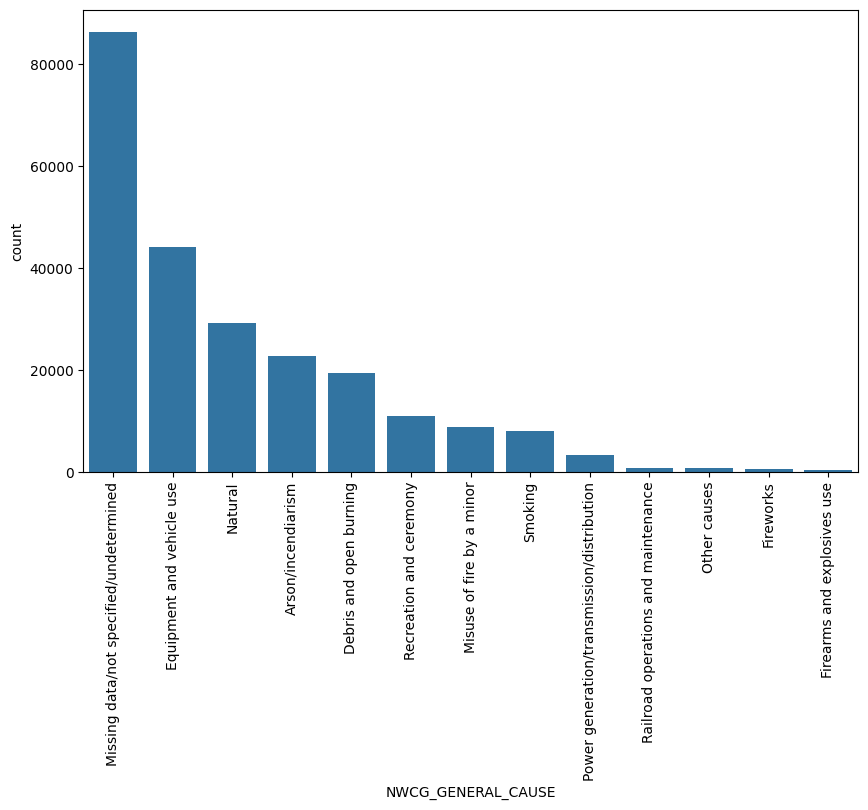

In [212]:
plt.figure(figsize=(10,6))
sns.barplot(fire_CA['NWCG_GENERAL_CAUSE'].value_counts())
plt.xticks(rotation=90);

Text(0, 0.5, 'No. of fires')

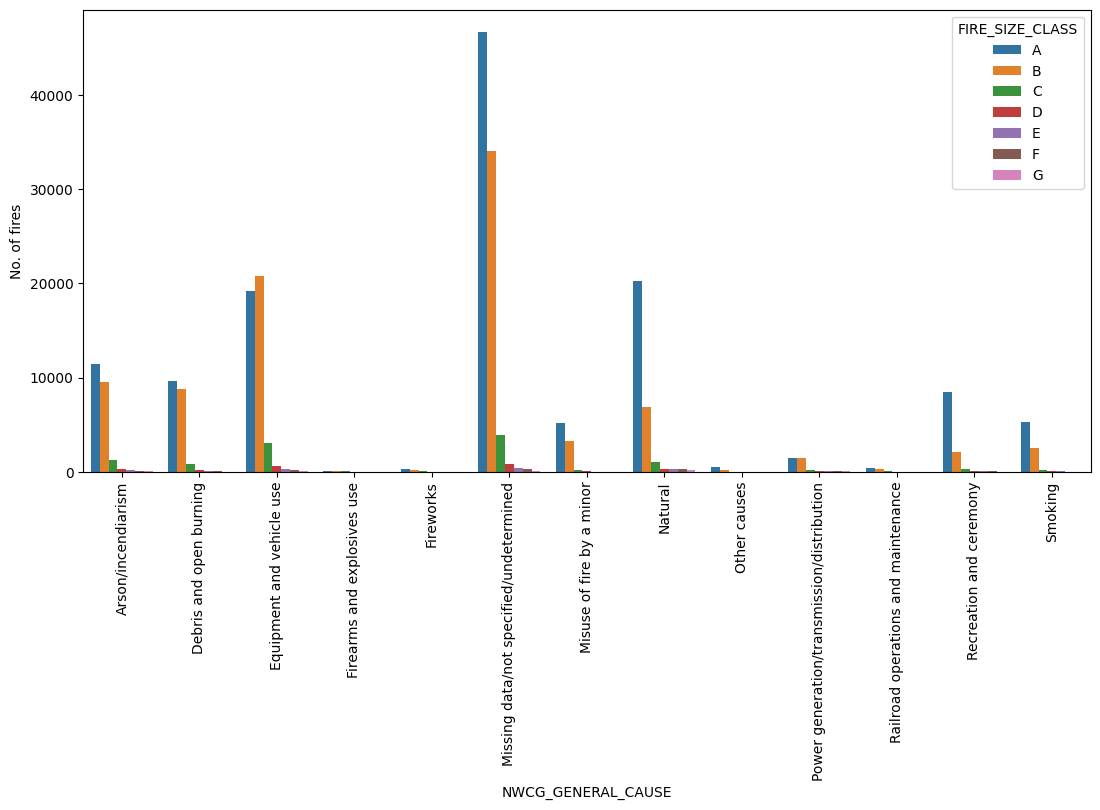

In [168]:
plt.figure(figsize=(13,6))
sns.barplot(x='NWCG_GENERAL_CAUSE',y= 0,hue='FIRE_SIZE_CLASS', data = pd.DataFrame(fire_CA.groupby('NWCG_GENERAL_CAUSE')['FIRE_SIZE_CLASS'].value_counts()).stack().to_frame().reset_index())
plt.xticks(rotation=90)
plt.ylabel('No. of fires')


In [161]:
pd.DataFrame(fire_CA.groupby('NWCG_GENERAL_CAUSE')['FIRE_SIZE_CLASS'].value_counts()).stack().to_frame().reset_index()

,NWCG_GENERAL_CAUSE,FIRE_SIZE_CLASS,level_2,0
0,Arson/incendiarism,A,count,11427
1,Arson/incendiarism,B,count,9568
2,Arson/incendiarism,C,count,1225
3,Arson/incendiarism,D,count,242
4,Arson/incendiarism,E,count,148
...,...,...,...,...
86,Smoking,C,count,207
87,Smoking,D,count,50
88,Smoking,E,count,24
89,Smoking,F,count,8


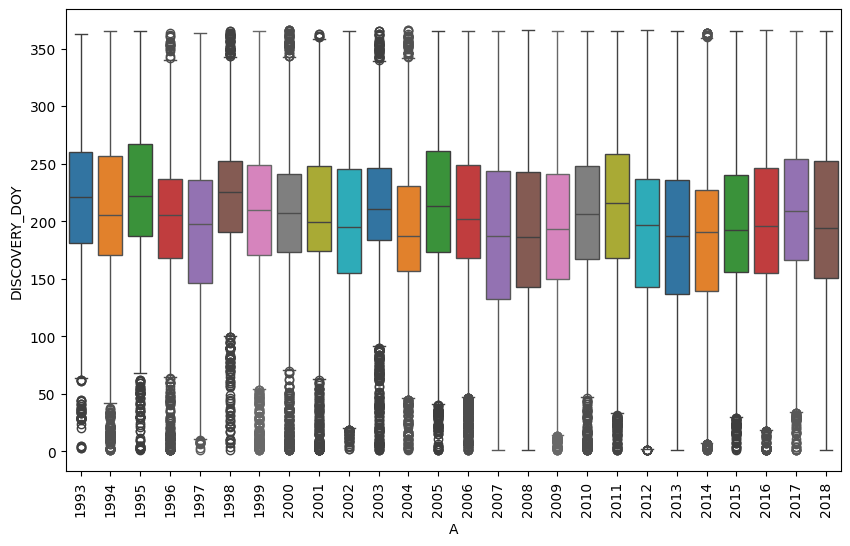

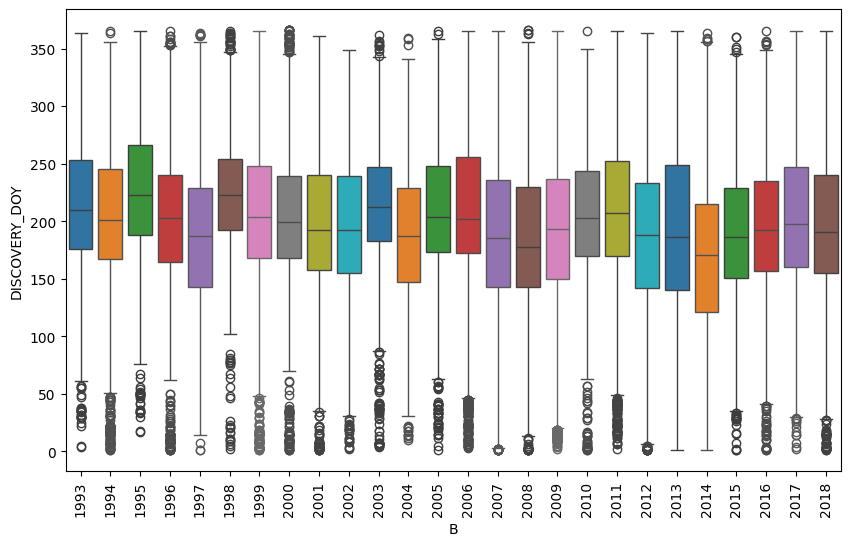

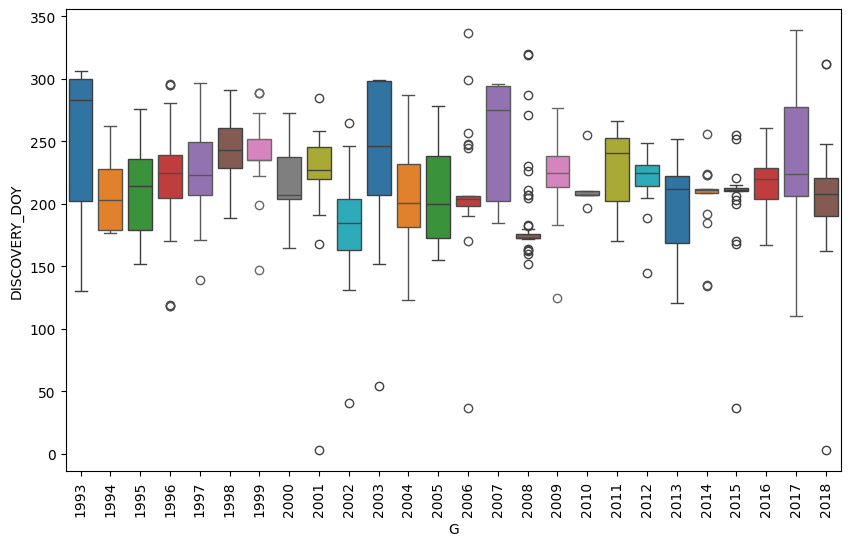

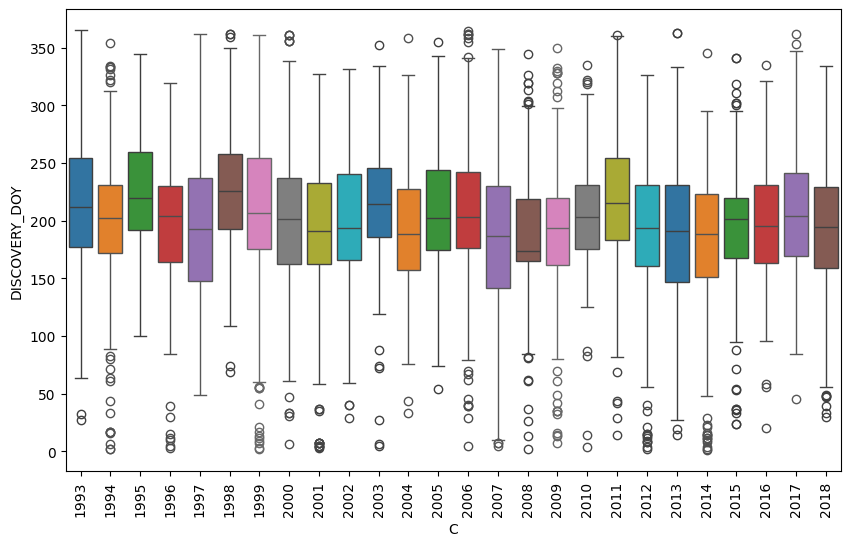

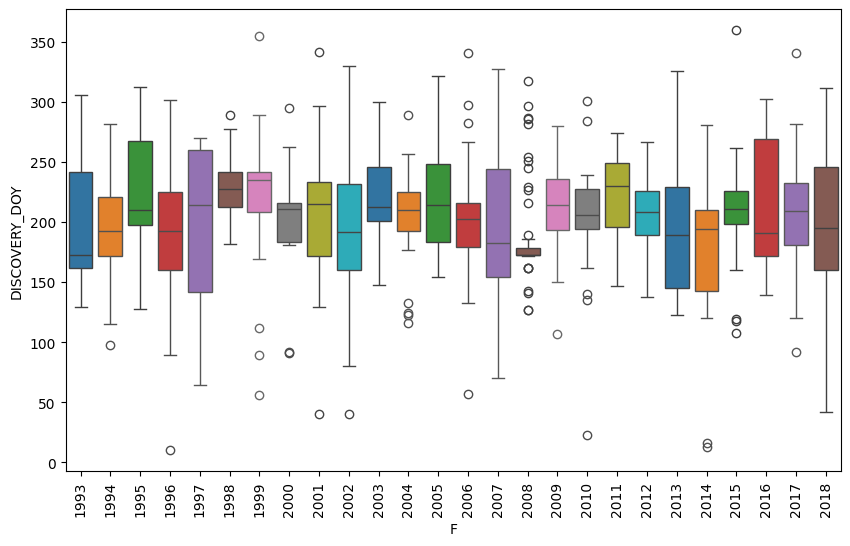

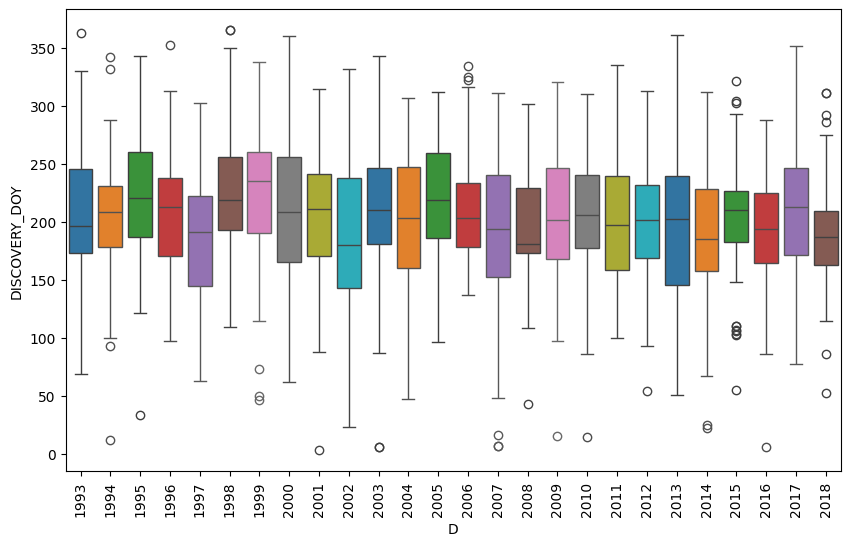

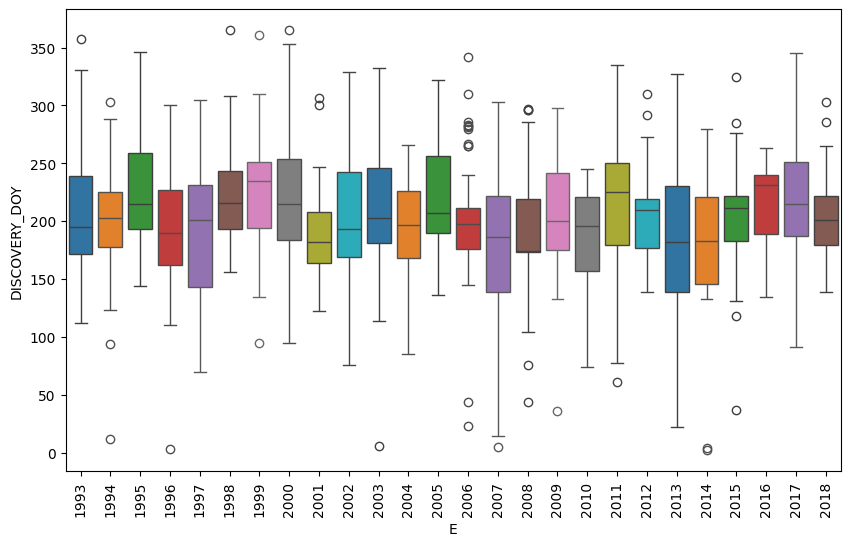

In [214]:
import warnings 
warnings.filterwarnings("ignore")

for fire_class in fire_CA['FIRE_SIZE_CLASS'].unique():
    plt.figure(figsize=(10,6))
    for i in range(1993,2019):
        sns.boxplot(x=i, y= fire_CA.groupby(['FIRE_SIZE_CLASS','FIRE_YEAR'])['DISCOVERY_DOY'].get_group((fire_class, i)))
    plt.xlabel(fire_class)
    plt.xticks(rotation=90);

<AxesSubplot: ylabel='Density'>

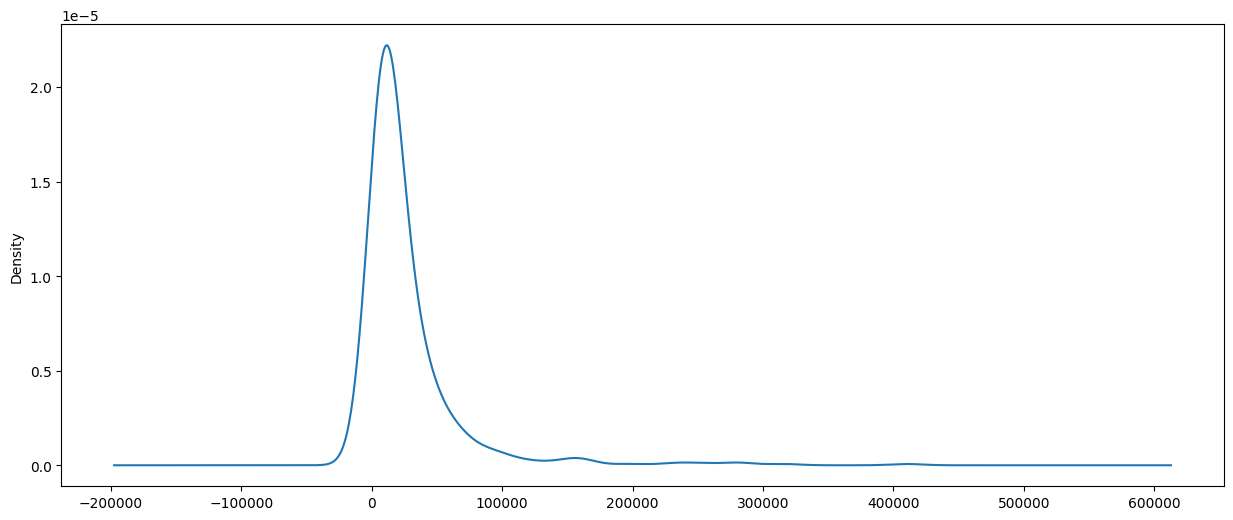

In [237]:
fire_CA.groupby('FIRE_SIZE_CLASS')['FIRE_SIZE'].get_group(('G')).plot(kind='density',figsize=(15,6))
# plt.legend(['A','B','C','D','E','F','G'],fontsize=8)

Gumbel Parameters: loc=1.6242980346575449, scale=4891.852221334224
KS Statistic: 0.0380280970568867, P-value: 0.48229494012702634


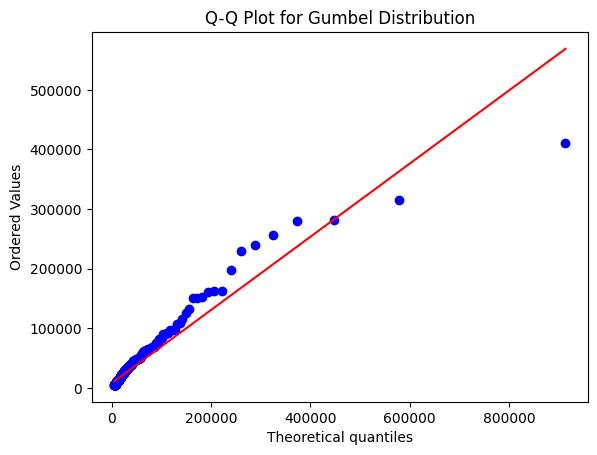

In [328]:
import scipy.stats as stats
data = fire_CA[fire_CA['FIRE_SIZE_CLASS']=='G']['FIRE_SIZE']
params = stats.lognorm.fit(data)
print(f"Gumbel Parameters: loc={params[0]}, scale={params[1]}")

# # Fit to Generalized Extreme Value (GEV) distribution
# gev_params = stats.genextreme.fit(data)
# print(f"GEV Parameters: shape={gev_params[0]}, loc={gev_params[1]}, scale={gev_params[2]}")

ks_stat, p_value = stats.kstest(data, 'lognorm', args=params)
print(f"KS Statistic: {ks_stat}, P-value: {p_value}")

stats.probplot(data, dist='lognorm', sparams=params, plot=plt)
plt.title("Q-Q Plot for Gumbel Distribution")
plt.show()

In [308]:
from fitter import Fitter, get_distributions
get_distributions()

['_fit',
 'alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gibrat',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3'

In [362]:
Q1 = data.quantile(0.05)
Q3 = data.quantile(0.95)
IQR = Q3-Q1
up = Q3+1.5*IQR
low = Q1-1.5*IQR
data1 = data[(data<up)&(data>low)]

KS Statistic: 0.0380280970568867, P-value: 0.48229494012702634
lognorm Parameters: loc=1.6242980346575449, scale=4891.852221334224


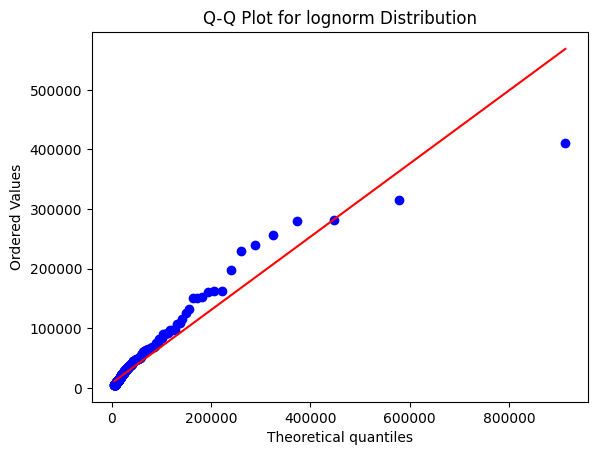

KS Statistic: 0.05290104310363677, P-value: 0.13288954384011675
chi2 Parameters: loc=1.1095036877635867, scale=4999.999999999999


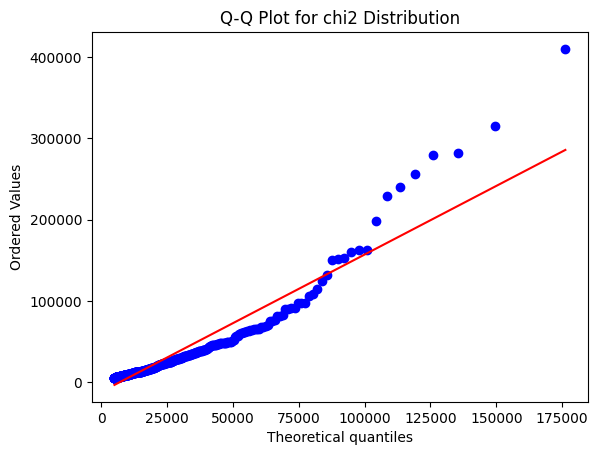

KS Statistic: 0.044770911171113204, P-value: 0.28484635831501726
pareto Parameters: loc=1.3529775454443183, scale=-6437.0403419782015


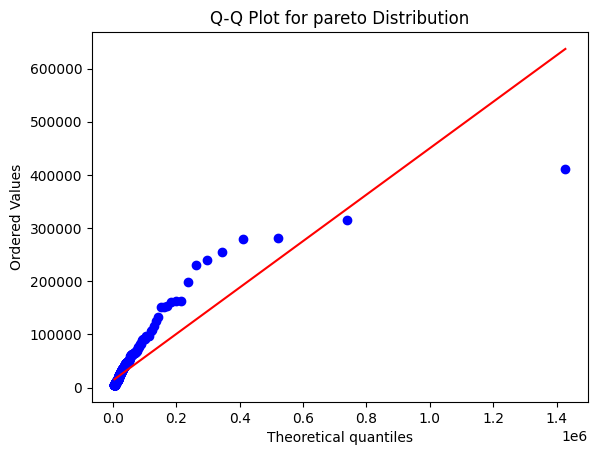

KS Statistic: 0.03925580480672284, P-value: 0.4416688519777483
exponweib Parameters: loc=1.275628147504178, scale=0.5671576019874924


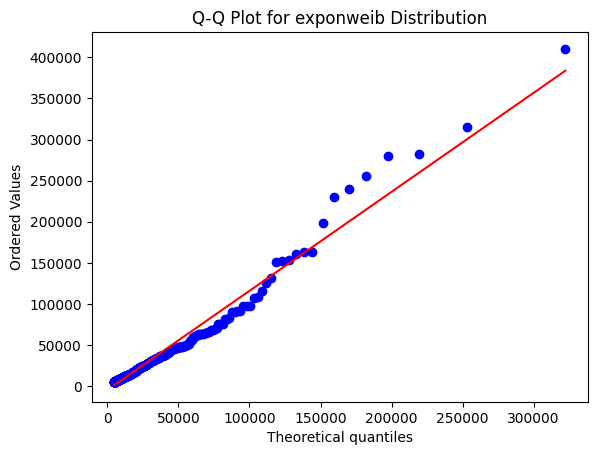

KS Statistic: 0.04466983899691701, P-value: 0.28731706706333626
genpareto Parameters: loc=0.7388060424545841, scale=4999.999994233325


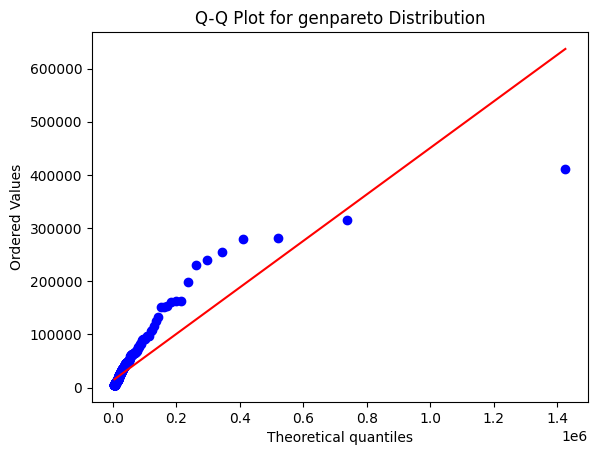

In [366]:
distributions = [
    stats.norm,           # Normal distribution
    stats.expon,          # Exponential distribution
    stats.gamma,          # Gamma distribution
    stats.beta,           # Beta distribution
    stats.weibull_min,    # Weibull (minimum)
    stats.weibull_max,    # Weibull (maximum)
    stats.lognorm,        # Log-normal distribution
    stats.gumbel_r,       # Gumbel (right-skewed)
    stats.gumbel_l,       # Gumbel (left-skewed)
    stats.genextreme,     # Generalized Extreme Value
    stats.uniform,        # Uniform distribution
    stats.t,              # Student's t-distribution
    stats.chi2,           # Chi-squared distribution
    stats.f,              # F-distribution
    stats.pareto,         # Pareto distribution
    stats.exponweib,
    stats.exponpow,
    stats.genpareto
]

for dist in distributions:
    params = dist.fit(data)

    # # Fit to Generalized Extreme Value (GEV) distribution
    # gev_params = stats.genextreme.fit(data)
    # print(f"GEV Parameters: shape={gev_params[0]}, loc={gev_params[1]}, scale={gev_params[2]}")

    ks_stat, p_value = stats.kstest(data, dist.name, args=params)
    if p_value>0.05:
        print(f"KS Statistic: {ks_stat}, P-value: {p_value}")
        print(f"{dist.name} Parameters: loc={params[0]}, scale={params[1]}")
        stats.probplot(data, dist=dist.name, sparams=params, plot=plt)
        plt.title(f"Q-Q Plot for {dist.name} Distribution")
        plt.show()

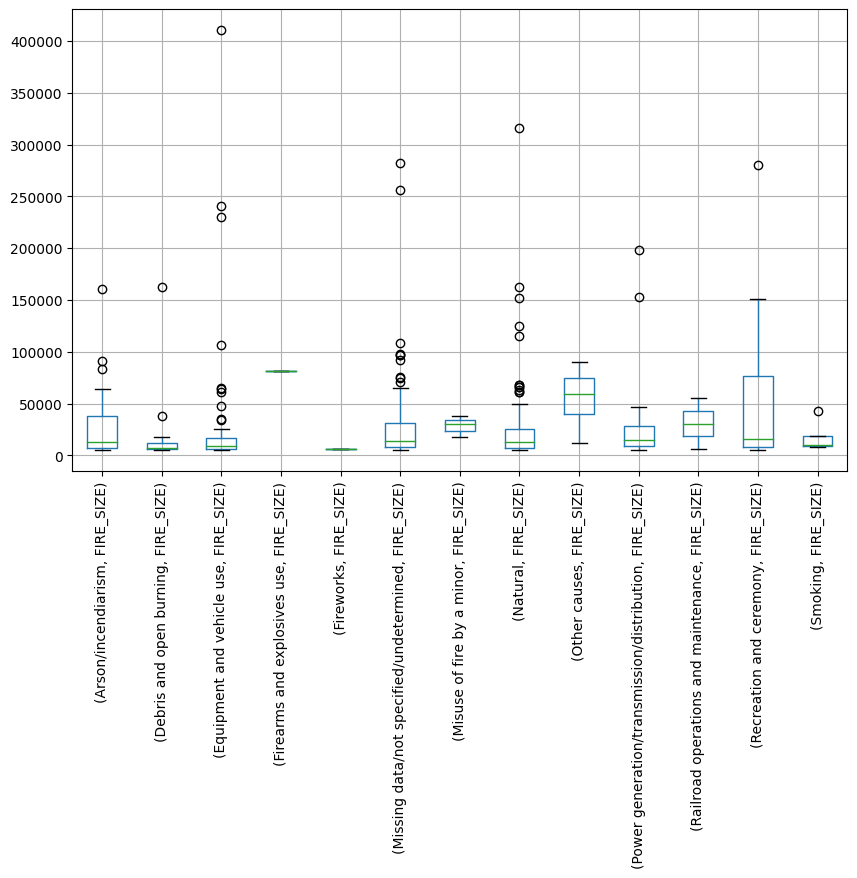

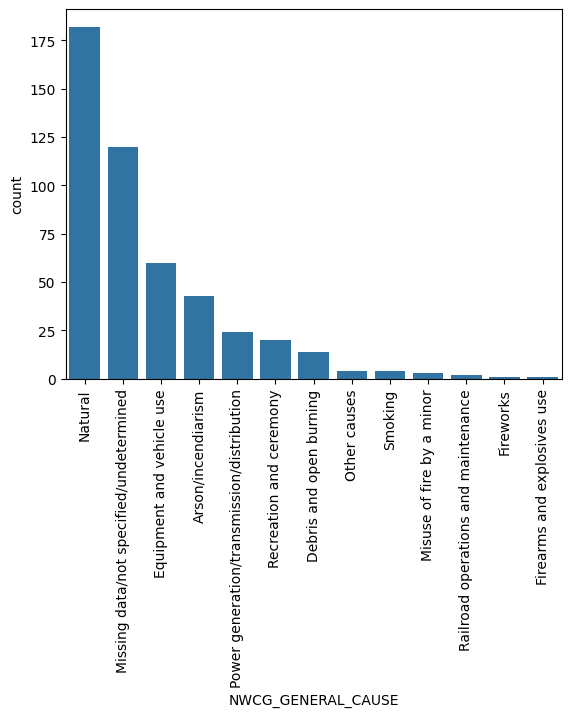

In [356]:
fire_CA[fire_CA['FIRE_SIZE_CLASS']=='G'].groupby('NWCG_GENERAL_CAUSE')[['FIRE_SIZE']].boxplot(subplots=False, rot=90,figsize=(10,6))
plt.show()
sns.barplot(fire_CA[fire_CA['FIRE_SIZE_CLASS']=='G']['NWCG_GENERAL_CAUSE'].value_counts())
plt.xticks(rotation=90);

In [364]:
up

218368.02499999997